Imports

In [1]:
import os
import pickle
import yaml
import numpy as np
import matplotlib.pyplot as plt
from neurometry.datasets.load_rnn_grid_cells import umap_dbscan

2024-08-06 13:54:56.862212: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-06 13:54:57.512388: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Load pre-trained activations

In [2]:
pretrained_run_id = "20240418-180712"
pretrained_run_dir = os.path.join(
    os.getcwd(),
    f"logs/rnn_isometry/{pretrained_run_id}",
)

pretrained_activations_file = os.path.join(pretrained_run_dir, "ckpt/activations/activations-step25000.pkl")
with open(pretrained_activations_file, "rb") as f:
    pretrained_activations = pickle.load(f)

pretrained_config_file = os.path.join(pretrained_run_dir, "config.txt")
with open(pretrained_config_file) as f:
    pretrained_config = yaml.safe_load(f)

pretrained_clusters, umap_cluster_labels = umap_dbscan(
    pretrained_activations["v"], pretrained_run_dir, pretrained_config, sac_array=None, plot=False
)

neural_points_pretrained = {}
rate_maps_pretrained = {}
for id in np.unique(umap_cluster_labels):
    rate_maps_pretrained[id] = pretrained_activations["v"][umap_cluster_labels == id]
    neural_points_pretrained[id] = rate_maps_pretrained[id].reshape(len(rate_maps_pretrained[id]), -1).T

/home/facosta/miniconda3/envs/neurometry/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/facosta/miniconda3/envs/neurometry/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


Helper functions

In [3]:
def _get_expt_activations_per_cluster(run_name):
    activations = _load_expt_rate_maps(run_name)["v"]
    neural_points_expt = {}
    rate_maps_expt = {}
    for id in np.unique(umap_cluster_labels):
        rate_maps_expt[id] = activations[umap_cluster_labels == id]
        neural_points_expt[id] = rate_maps_expt[id].reshape(len(rate_maps_expt[id]), -1).T
    return neural_points_expt, rate_maps_expt


def _load_expt_rate_maps(run_name):
    activations_dir = os.getcwd()
    activations_file = os.path.join(activations_dir, f"{run_name}_activations.pkl")
    with open(activations_file, "rb") as f:
        return pickle.load(f)

def _load_expt_config(run_name):
    configs_dir = os.getcwd()
    config_file = os.path.join(configs_dir, f"{run_name}.json")

    with open(config_file) as file:
        return yaml.safe_load(file)

Load post-saliency training rate maps ("expt")

In [4]:
run_name = "run_qosfkmq5_s_0=1_sigma_saliency=0.05_x_saliency=0.5"
posttrained_activation_file_path = os.path.join(os.getcwd(), f'results/activations/{run_name}_activations.pkl')

with open(posttrained_activation_file_path, "rb") as f:
    posttrained_activations = pickle.load(f)

expt_config = _load_expt_config(run_name)
neural_points_expt, rate_maps_expt = _get_expt_activations_per_cluster(run_name)

The dictionary keys represent the modules:

In [5]:
print(rate_maps_pretrained.keys())
print(rate_maps_expt.keys())

dict_keys([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
dict_keys([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


Module #8 has 13 neurons, and rate maps with resolution 40 x 40

In [6]:
print(rate_maps_pretrained[8].shape)
print(rate_maps_expt[8].shape)

(13, 40, 40)
(13, 40, 40)


Visualize rate maps for module 8, neuron 10

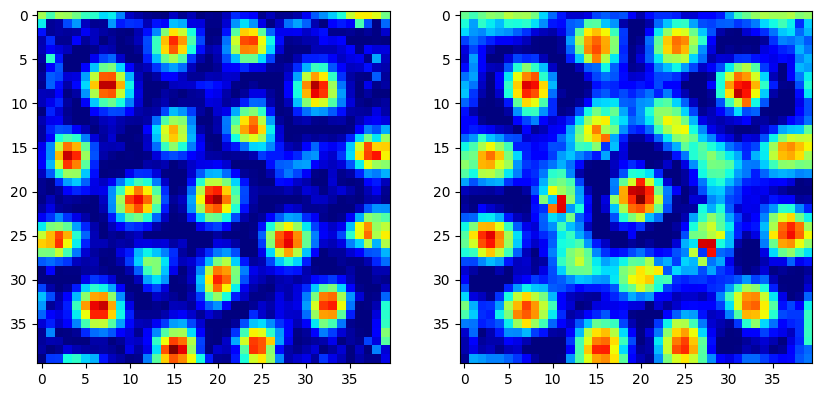

In [11]:
module_id = 8
neuron_id = 10
#visualize both rate maps for cluster 8
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(rate_maps_pretrained[module_id][neuron_id],cmap="jet");
plt.subplot(1,2,2)
plt.imshow(rate_maps_expt[module_id][neuron_id],cmap="jet");
plt.show()